# Casos da COVID-19 no Rio de Janeiro 
# Com Média Móvel - 14 dias

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.model_selection import TimeSeriesSplit

pd.set_option('display.max_rows',10000) #Para muitas linhas 
dados_total = pd.read_csv('C:/Users/Annie/Pictures/060720/dadocaso1.csv')
dados_total.data = pd.to_datetime(dados_total.data) #Transformou o dado em data
dados_total.set_index('data',inplace = True) #Tornou a data como índice
dados_total.head()

,casos
data,
2020-02-15,4
2020-02-16,1
2020-02-17,4
2020-02-18,3
2020-02-19,6


In [2]:
dados = dados_total.rolling(window=14).mean() #Janela de 14 dias
dados.tail()

,casos
data,
2020-06-26,653.642857
2020-06-27,619.571429
2020-06-28,589.571429
2020-06-29,531.642857
2020-06-30,501.642857


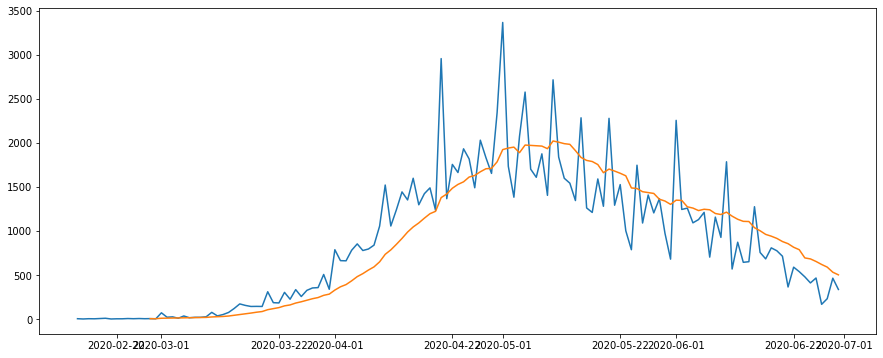

In [3]:
plt.figure(figsize = (15,6))
plt.plot(dados_total)
plt.plot(dados)

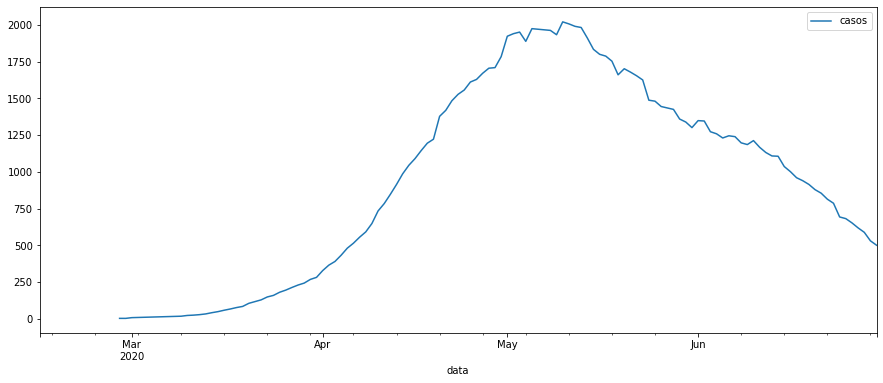

In [4]:
dados.plot(figsize = (15,6)) 

# Analisar a Tendência

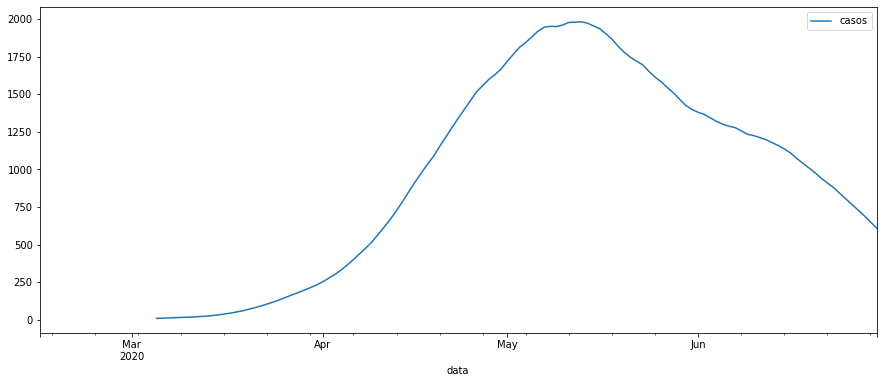

In [5]:
dados.rolling(7).mean().plot(figsize = (15,6)) #Período de 7 por ser dia da semana

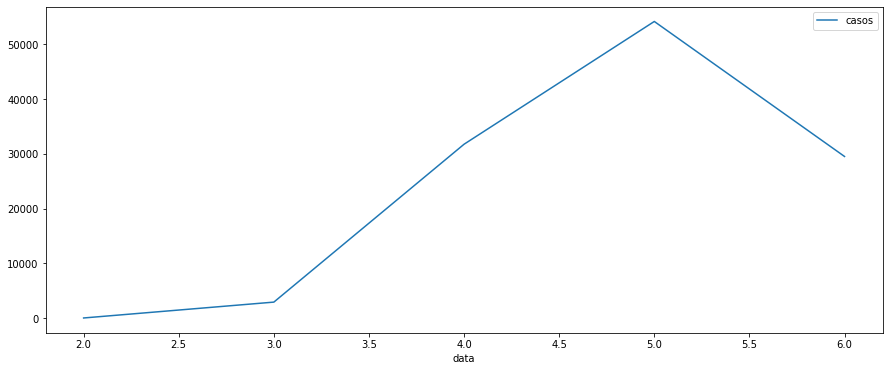

In [6]:
dados.groupby(dados.index.month).sum().plot(figsize = (15,6)) #Agrupando por mês

# Sazonalidade

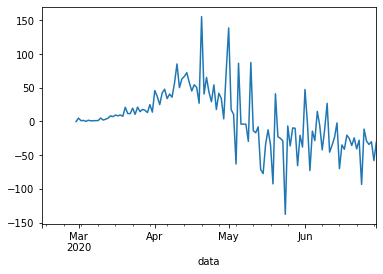

In [7]:
dados.casos.diff() #Diferença da quantidade do dia anterior
dados.casos.diff().plot()

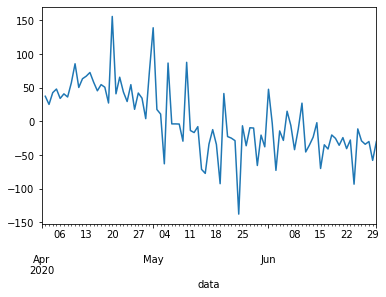

In [8]:
filtro = (dados.index.month >= 4) #filtro de abril em diante
dados[filtro].casos.diff().plot() #analisar os picos

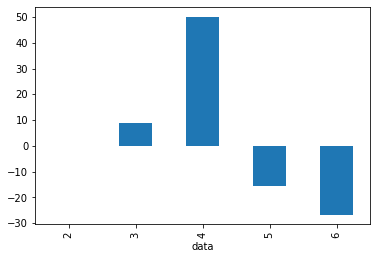

In [9]:
dados.casos.groupby(dados.index.month).mean()
dados.casos.diff().groupby(dados.index.month).mean().plot(kind = 'bar') #Dos meses

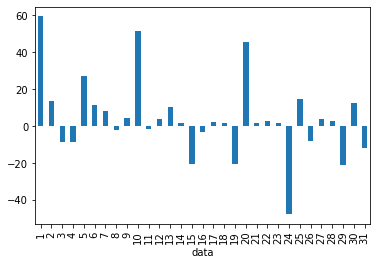

In [10]:
dados.casos.diff().groupby(dados.index.day).mean().plot(kind = 'bar') #Dias

# Modelo Preditivo:
# Modelo Naive

In [11]:
dados['naive'] = dados.casos.shift(1) #Modelo básico usa como previsão o dado do dia anterior
dados.head()

,casos,naive
data,,
2020-02-15,NaN,NaN
2020-02-16,NaN,NaN
2020-02-17,NaN,NaN
2020-02-18,NaN,NaN
2020-02-19,NaN,NaN


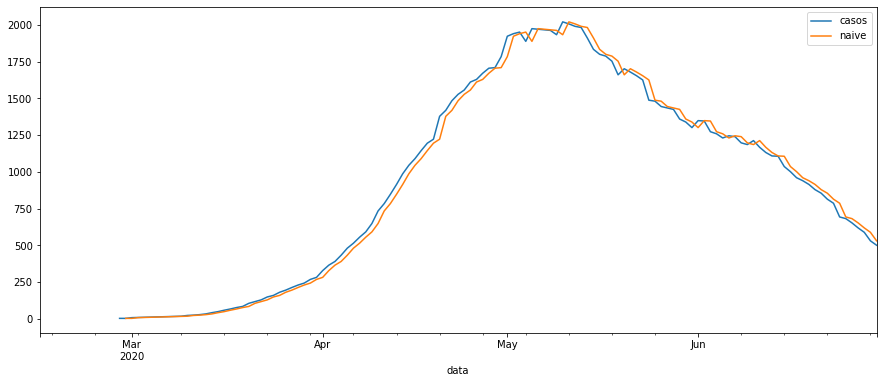

In [12]:
dados.plot(figsize = (15,6))

In [13]:
import numpy as np #MAPE 

def mean_absolute_percentage_error(y_true, y_pred): 
    # y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) /(y_true))) * 100


In [14]:
((dados.casos - dados.naive)**2).mean() #Cálculo do erro médio ao quadrado 
mean_absolute_percentage_error(dados.casos, dados.naive)

6.008932480317177

# Modelo AutoRegressor (AR)

# Lag = 1

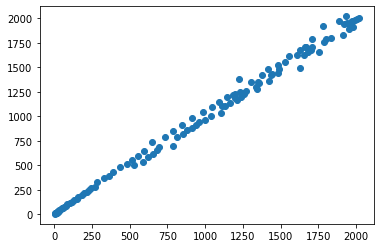

In [15]:
dados['x1']= dados.casos.shift(1) #Caso anterio = 1
dados.dropna(axis = 0, inplace = True) #Removendo as linhas nulas, pois o modelo não aceita
plt.scatter(dados.x1, dados.casos) #Gráfico de dispersão, para verificar se são lineares

In [16]:
#Com LAG = 1
from sklearn.linear_model import LinearRegression
X = dados.x1.values #Transformando em vetor 
y = dados.casos.values #Transformando em vetor
regressao = LinearRegression().fit(X.reshape(-1,1),y)
previsoes = regressao.predict(X.reshape(-1,1))
((y - previsoes)**2).mean() #Calculando o erro

1874.716279765976

Text(0, 0.5, 'Casos')

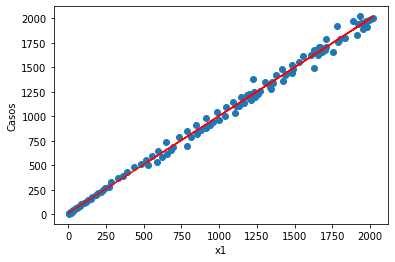

In [17]:
plt.scatter(X,y)
plt.plot(X, previsoes, color='red')
plt.xlabel('x1')
plt.ylabel('Casos')

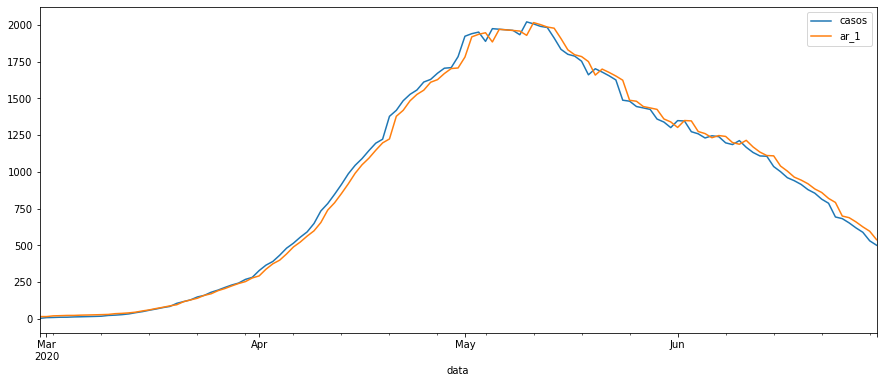

In [18]:
dados['ar_1']= previsoes
dados[['casos','ar_1']].plot(figsize = (15,6))

# Lag = 2

In [19]:
from statsmodels.tsa.ar_model import AR # o mesmo processo mais acelerado
ar_2 = AR(dados.casos, freq = 'D').fit(2) #frequencia de dias 
((ar_2.resid)**2).mean()

C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


1475.4695586376154

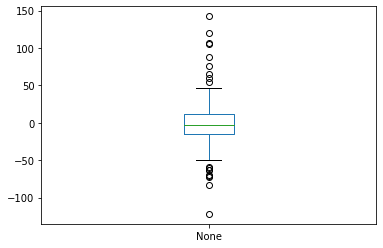

In [20]:
ar_2.resid.plot(kind = 'box') #boxplot. Analisando a distribuição do erro

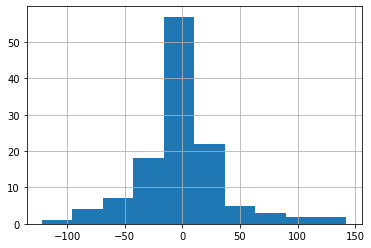

In [21]:
ar_2.resid.hist() #Analisando a distribuição do erro

# Lag = 3

In [22]:
from statsmodels.tsa.ar_model import AR #O mesmo processo mais acelerado
ar_3 = AR(dados.casos, freq = 'D').fit(3) #Frequência de dias 
((ar_3.resid)**2).mean()

C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


1291.0942584025968

In [23]:
ar_3.predict(start = '2020-07-01', end = '2020-07-01') #Previsão de um dia

2020-07-01    475.627242
Freq: D, dtype: float64

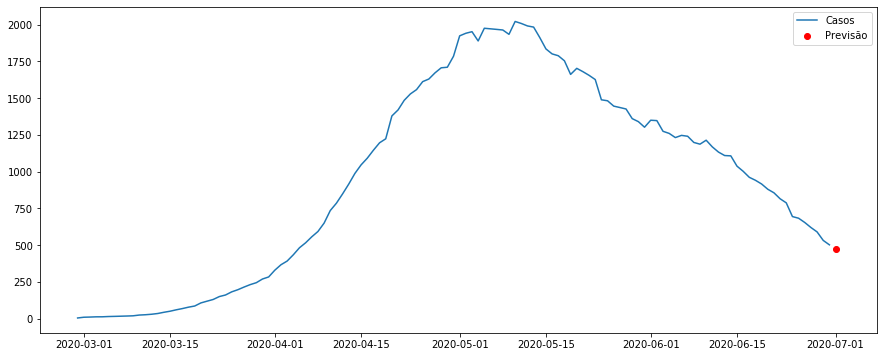

In [24]:
plt.figure(figsize = (15,6))
plt.plot(dados.casos)
forecast = ar_3.predict(start = '2020-07-01', end = '2020-07-01')
plt.scatter(forecast.index, forecast.values, color = 'red')
plt.legend(['Casos','Previsão'])

# Autocorrelação Total e Parcial

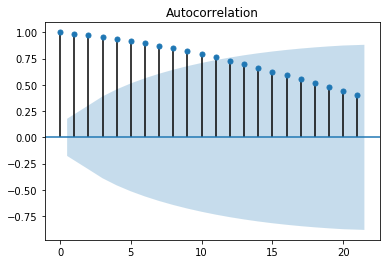

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(dados.casos) #Total
plt.show()

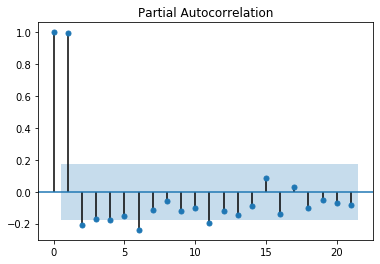

In [26]:
plot_pacf(dados.casos) #Parcial
plt.show()

# Validação Train/Test

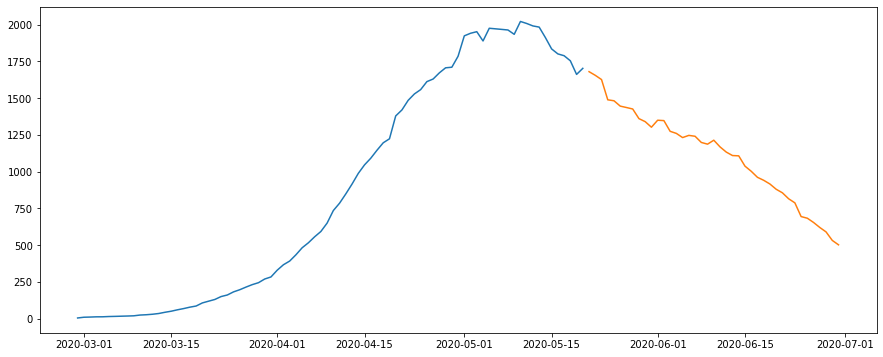

In [27]:
train_size = int(len(dados.casos)*2/3)
train_set = dados.casos[:train_size] #Dados para treino
test_set = dados.casos[train_size:] #Dados para teste
plt.figure(figsize = (15,6))
plt.plot(train_set)
plt.plot(test_set)

C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


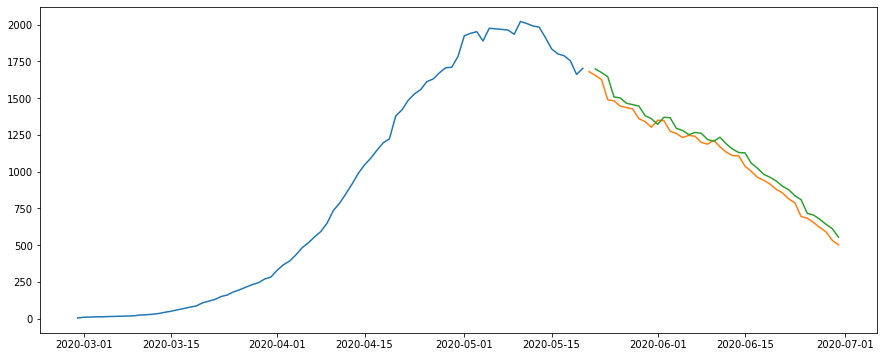

In [28]:
from statsmodels.tsa.ar_model import AR
ar_1 = AR(train_set, freq = 'D').fit(1)
#Função com lag = 1
previsao_1 = ar_1.params[0] + ar_1.params[1]*test_set.shift(1) 
plt.figure(figsize = (15,6))
plt.plot(train_set)
plt.plot(test_set)
plt.plot(previsao_1) #Verde

In [29]:
mean_absolute_percentage_error(test_set, previsao_1)

5.3042139402373145

C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


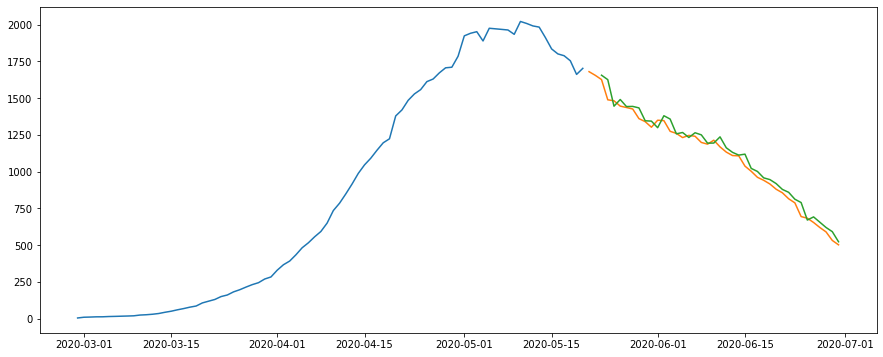

In [30]:
#Com t-2
from statsmodels.tsa.ar_model import AR
ar_2 = AR(train_set, freq = 'D').fit(2)
#Função com lag = 2 
previsao_2 = ar_2.params[0] + ar_2.params[1]*test_set.shift(1) +  ar_2.params[2]*test_set.shift(2)
plt.figure(figsize = (15,6))
plt.plot(train_set)
plt.plot(test_set)
plt.plot(previsao_2) #Verde

In [31]:
mean_absolute_percentage_error(test_set, previsao_2)

3.7381357951698972

C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


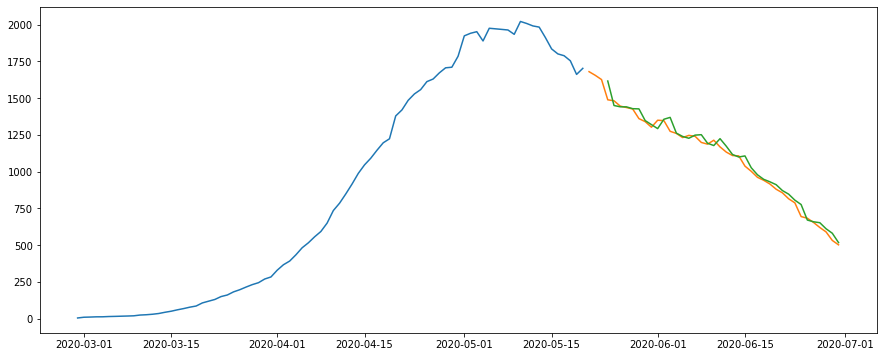

In [32]:
#Com t-3
from statsmodels.tsa.ar_model import AR
ar_3 = AR(train_set, freq = 'D').fit(3)
#Função com lag = 3
previsao_3 = ar_3.params[0]
for i, coef in enumerate(ar_3.params[1:]):
    previsao_3 += coef * test_set.shift(i + 1)
#Gráfico
plt.figure(figsize = (15,6))
plt.plot(train_set)
plt.plot(test_set)
plt.plot(previsao_3) #Verde, sem 3 dias divido ao modelo  

In [33]:
mean_absolute_percentage_error(test_set, previsao_3)

2.9333742138676624

C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


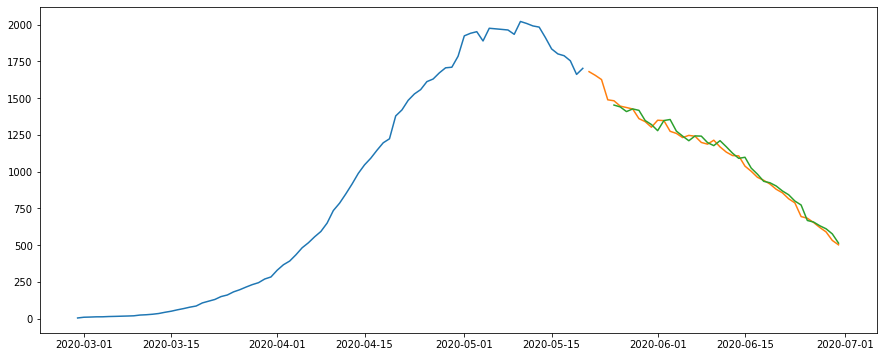

In [34]:
#Com t-4
from statsmodels.tsa.ar_model import AR
ar_4 = AR(train_set, freq = 'D').fit(4)
#Função com lag = 4
previsao_4 = ar_4.params[0]
for i, coef in enumerate(ar_4.params[1:]):
    previsao_4 += coef * test_set.shift(i + 1)
#Gráfico
plt.figure(figsize = (15,6))
plt.plot(train_set)
plt.plot(test_set)
plt.plot(previsao_4) #Verde, sem 4 dias divido ao modelo   

In [35]:
mean_absolute_percentage_error(test_set, previsao_4)

2.5817937355585374

C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


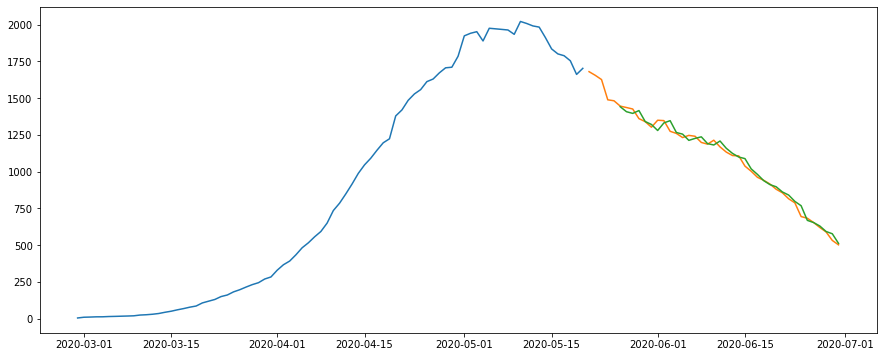

In [36]:
#Com t-5
from statsmodels.tsa.ar_model import AR
ar_5 = AR(train_set, freq = 'D').fit(5)
#Função com lag = 5
previsao_5 = ar_5.params[0]
for i, coef in enumerate(ar_5.params[1:]):
    previsao_5 += coef * test_set.shift(i + 1)
#Gráfico
plt.figure(figsize = (15,6))
plt.plot(train_set)
plt.plot(test_set)
plt.plot(previsao_5) #Verde, sem 5 dias divido ao modelo   

In [37]:
mean_absolute_percentage_error(test_set, previsao_5)

2.328298510969217

C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


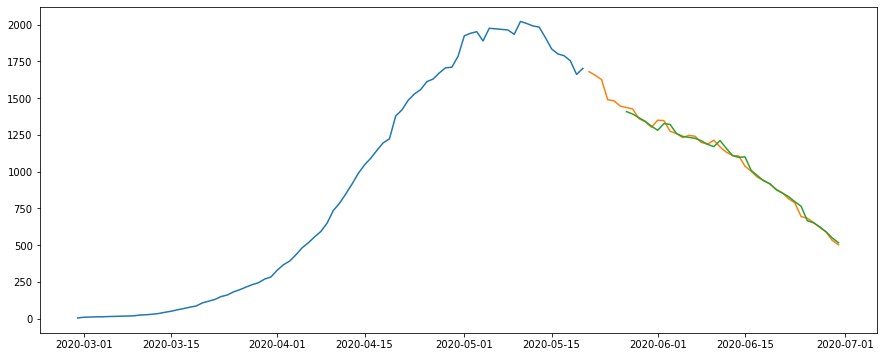

In [38]:
#Com t-6
from statsmodels.tsa.ar_model import AR
ar_6 = AR(train_set, freq = 'D').fit(6)
#Função com lag = 6
previsao_6 = ar_6.params[0]
for i, coef in enumerate(ar_6.params[1:]):
    previsao_6 += coef * test_set.shift(i + 1)
#Gráfico
plt.figure(figsize = (15,6))
plt.plot(train_set)
plt.plot(test_set)
plt.plot(previsao_6) #Verde, sem 6 dias divido ao modelo 

In [39]:
mean_absolute_percentage_error(test_set, previsao_6)

1.7624748244508257

C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


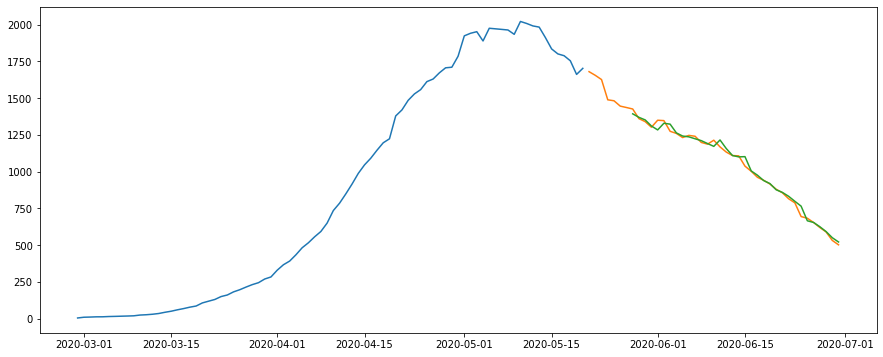

In [40]:
#Com t-7
from statsmodels.tsa.ar_model import AR
ar_7 = AR(train_set, freq = 'D').fit(7)
#Função com lag = 7
previsao_7 = ar_7.params[0]
for i, coef in enumerate(ar_7.params[1:]):
    previsao_7 += coef * test_set.shift(i + 1)
#Gráfico
plt.figure(figsize = (15,6))
plt.plot(train_set)
plt.plot(test_set)
plt.plot(previsao_7) #Verde, sem 7 dias divido ao modelo  

In [41]:
mean_absolute_percentage_error(test_set, previsao_7)

1.864545623422384

# Modelo AutoRegrssivo de Médias Moveis (ARMA)

C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


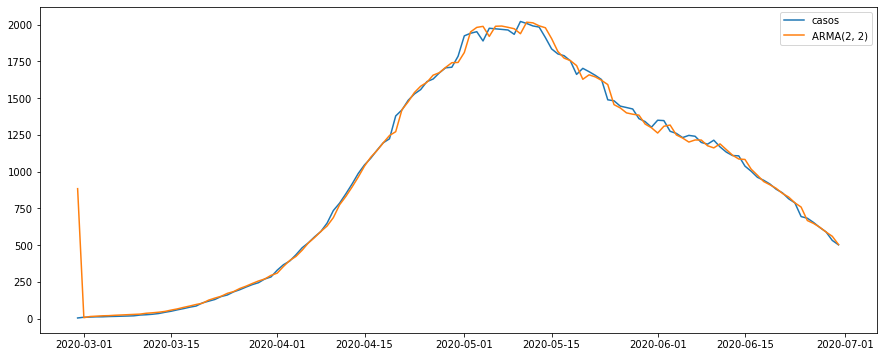

In [42]:
from statsmodels.tsa.arima_model import ARMA
arma = ARMA(dados.casos, freq = 'D', order = (2,2)).fit()
plt.figure(figsize = (15,6))
plt.plot(dados.casos)
plt.plot(arma.predict())
plt.legend(['casos', 'ARMA(2, 2)'])

In [43]:
#Para validar (1,1)
n = len(dados.casos)
train_size = int(n*2/3)
train_set = dados.casos[:train_size]
test_set = dados.casos[train_size:]
arma11_train = ARMA(train_set, freq = 'D', order = (1,1)).fit()
arma11_train.params
arma11_test = ARMA(test_set, freq = 'D', order = (1,1)).fit(arma11_train.params)
(arma11_test.resid ** 2).mean()

9960.46303475225

In [44]:
#Para validar (1,2)
n = len(dados.casos)
train_size = int(n*2/3)
train_set = dados.casos[:train_size]
test_set = dados.casos[train_size:]
arma12_train = ARMA(train_set, freq = 'D', order = (1,2)).fit()
arma12_train.params
arma12_test = ARMA(test_set, freq = 'D', order = (1,2)).fit(arma12_train.params)
(arma12_test.resid ** 2).mean()

10212.701239679061

In [45]:
configs = [(1,1),(1,2),(1,3),(1,6),(2,0),(3,0)] #Os testes que não geraram erro
best = 100000
for config in configs:
    arma = ARMA(train_set, freq = 'D', order = config).fit()
    arma_test = ARMA(test_set,freq = 'D', order = config).fit(arma.params)
    erro = np.mean(np.abs((arma_test.resid) /(test_set))) * 100
    print(config,erro) 

(1, 1) 3.901446588147396
(1, 2) 3.575793039075106


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(1, 3) 3.5640867299619434


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(1, 6) 15.838308097295947
(2, 0) 3.689218725510815
(3, 0) 3.241834571805631


# Modelo Integrado AutoRegressivo de Média Móveis (ARIMA)

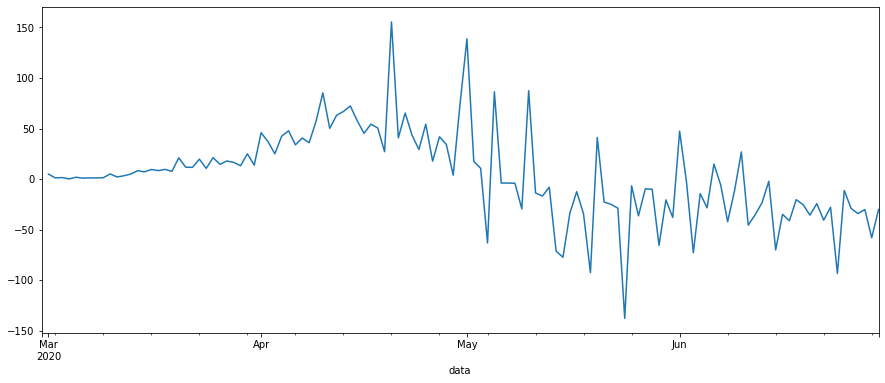

In [46]:
dados.casos.diff().plot(figsize=(15,6))

In [47]:
from statsmodels.tsa.arima_model import ARIMA
arima = ARIMA(dados.casos, freq='D', order=(5,1,2)).fit()
(arima.resid**2).mean()

948.364329961106

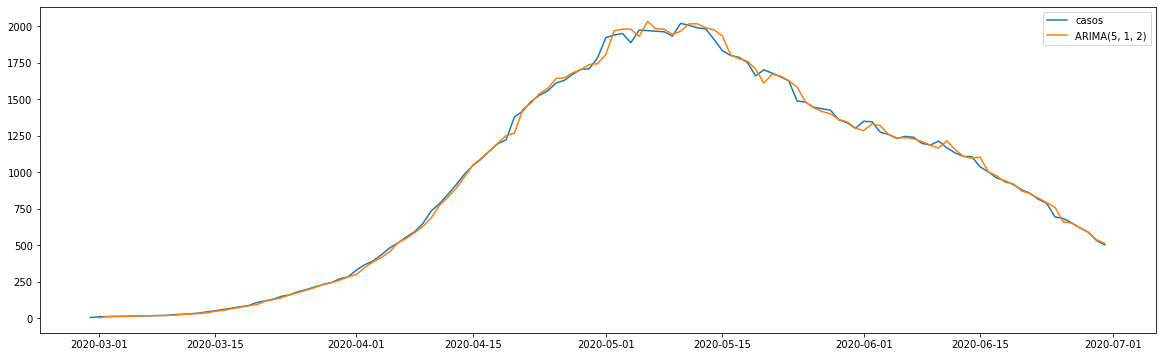

In [48]:
plt.figure(figsize=(20, 6))
plt.plot(dados.casos)
plt.plot(arima.predict(typ='levels')) #typ é usado para reverter o diff
plt.legend(['casos', 'ARIMA(5, 1, 2)'])

In [49]:
arima.forecast()[0]

array([466.46870394])

In [50]:
orders = [(1,1,1),(1,1,2),(1,2,2),(2,1,1),(2,2,1),(2,1,2),(2,2,2),(3,1,1),(3,1,2),(3,2,2),(3,2,1),(3,2,3),(3,1,3),(3,3,3),(4,2,2),(5,2,3),(4,1,1),(5,1,1),(6,1,1)]
best = 10000
for order in orders:
    try:
        model_train = ARIMA(train_set, freq='D', order=order).fit()
        model_test = ARIMA(test_set, freq='D', order=order).fit(model_train.params)
        erro = np.mean(np.abs((model_test .resid) /(test_set))) * 100
        print(f'ARIMA{order} = {erro}')

    except:
        pass

ARIMA(1, 2, 2) = 2.1024701088505515


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packag

ARIMA(2, 1, 1) = 1.8154913045968608
ARIMA(2, 2, 1) = 2.1030178025517867


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARIMA(2, 2, 2) = 2.0375870345282325


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 1) = 1.787619405932727


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARIMA(3, 2, 2) = 2.1011251459856646
ARIMA(3, 2, 1) = 2.1091393058089025


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARIMA(3, 2, 3) = 2.074442286243788


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARIMA(4, 2, 2) = 2.132305724139131
ARIMA(5, 2, 3) = 1.9559840953414256
ARIMA(4, 1, 1) = 1.8361218029353956
ARIMA(5, 1, 1) = 1.61589075172914
ARIMA(6, 1, 1) = 1.6234861434231675


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [80]:
#O MELHOR RESULTADO
model_train = ARIMA(train_set, freq='D', order=(5,1,1)).fit()
model_test = ARIMA(test_set, freq='D', order=(5,1,1)).fit(model_train.params)
erro = np.mean(np.abs((model_test.resid ) /(test_set))) * 100

In [81]:
model_test.predict(typ='levels',start='2020-07-01', end='2020-07-01')

2020-07-01    472.863359
Freq: D, dtype: float64

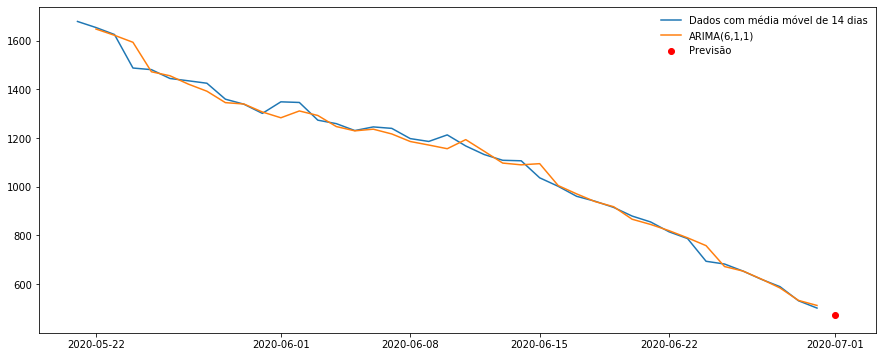

In [82]:
plt.figure(figsize=(15, 6))
plt.plot(test_set)
plt.plot(model_test.predict(typ='levels'))
forecast = model_test.predict(typ='levels',start='2020-07-01', end='2020-07-01')
plt.scatter(forecast.index, forecast.values, color='red')
plt.legend(['Dados com média móvel de 14 dias','ARIMA(5,1,1)', 'Previsão'], frameon=False)

# Modelo AutoRegressivo Sazonal de Média Móveis Integrado (SARIMA)

data
2    AxesSubplot(0.125,0.2;0.775x0.68)
3    AxesSubplot(0.125,0.2;0.775x0.68)
4    AxesSubplot(0.125,0.2;0.775x0.68)
5    AxesSubplot(0.125,0.2;0.775x0.68)
6    AxesSubplot(0.125,0.2;0.775x0.68)
Name: casos, dtype: object

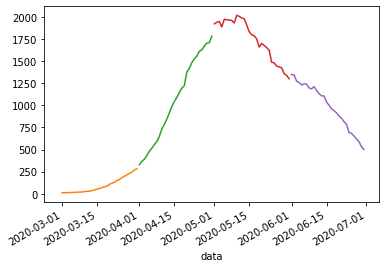

In [51]:
dados.casos.groupby(dados.index.month).plot() #cada mês

In [52]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(dados.casos, freq='D', order=(2, 1, 2), seasonal_order=(3, 1, 2, 12)).fit()
(sarima.resid ** 2).mean()

C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1086.9793626004753

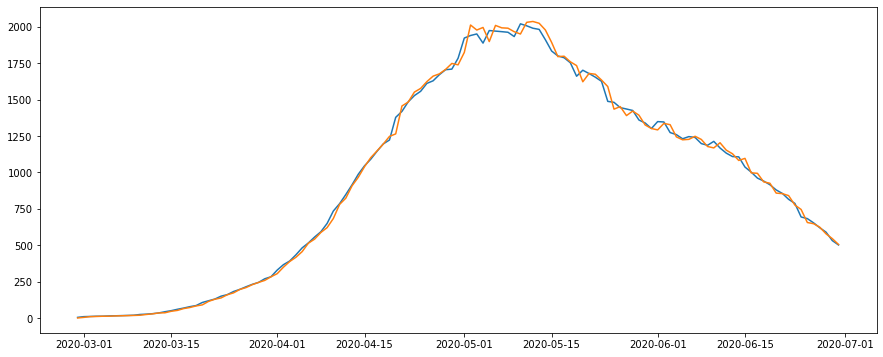

In [53]:
plt.figure(figsize=(15, 6))
plt.plot(dados.casos)
plt.plot(sarima.predict(typ='levels'))

In [54]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
orders = [(1,1,1,12),(1,1,2,12),(1,2,2,12),(2,1,1,12),(2,2,1,12),(2,1,2,12),(2,2,2,12),(3,1,1,12),(3,1,2,12),(3,2,2,12),(3,2,1,12),(3,2,3,12),(3,1,3,12),(3,3,3,12),(4,2,2,12),(5,2,3,12)]
best = 10000
for order in orders:
    try:
        model_train = SARIMAX(train_set, freq='D', order=(1, 1, 2), seasonal_order= order).fit()
        model_test = SARIMAX(test_set, freq='D', order=(1, 1, 2), seasonal_order= order).fit(model_train.params)
        erro = (model_test.resid ** 2).mean()
        print(f'SARIMA{order} = {erro}')

    except:
        pass

C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1, 12) = 87840.93072182899


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2, 12) = 87831.11486982887


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 2, 12) = 143820.89343383565


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1, 12) = 87840.44773970099


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 1, 12) = 143883.88047562918


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2, 12) = 87840.56466964117


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 2, 12) = 143893.09575868526


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 1, 12) = 87839.69852927471


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 2, 12) = 87840.71860207053


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 2, 12) = 143892.36949654782


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 1, 12) = 143866.0332869836


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 3, 12) = 143944.96829472855


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 3, 12) = 87840.53869086414


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(3, 3, 3, 12) = 188502.26834116288


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(4, 2, 2, 12) = 143882.52261050776


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(5, 2, 3, 12) = 143891.55889942904


In [55]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
orders = [(1,1,1,12),(1,1,2,12),(1,2,2,12),(2,1,1,12),(2,2,1,12),(2,1,2,12),(2,2,2,12),(3,1,1,12),(3,1,2,12),(3,2,2,12),(3,2,1,12),(3,2,3,12),(3,1,3,12),(3,3,3,12),(4,2,2,12),(5,2,3,12)]
best = 10000
for order in orders:
    try:
        model_train = SARIMAX(train_set, freq='D', order=(3, 1, 1), seasonal_order= order).fit()
        model_test = SARIMAX(test_set, freq='D', order=(3, 1, 1), seasonal_order= order).fit(model_train.params)
        erro = (model_test.resid ** 2).mean()
        print(f'SARIMA{order} = {erro}')

    except:
        pass

C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1, 12) = 87840.0422862124


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2, 12) = 87830.25405133172


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", 

SARIMA(2, 1, 1, 12) = 87839.80603586625


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 1, 12) = 143792.13084772349


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2, 12) = 87839.87143542794


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 2, 12) = 143792.07047257543


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 1, 12) = 87836.65797059835


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 2, 12) = 87839.09117316897


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 2, 12) = 143791.25419099853


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 1, 12) = 143789.7062530025


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 3, 12) = 143794.34454233132


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 3, 12) = 87839.62882611647


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 3, 3, 12) = 188282.67929330867


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(4, 2, 2, 12) = 143789.58190343657


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(5, 2, 3, 12) = 143791.85381947216


In [56]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
orders = [(1,1,1,12),(1,1,2,12),(1,2,2,12),(2,1,1,12),(2,2,1,12),(2,1,2,12),(2,2,2,12),(3,1,1,12),(3,1,2,12),(3,2,2,12),(3,2,1,12),(3,2,3,12),(3,1,3,12),(3,3,3,12),(4,2,2,12),(5,2,3,12)]
best = 10000
for order in orders:
    try:
        model_train = SARIMAX(train_set, freq='D', order=(2, 1, 1), seasonal_order= order).fit()
        model_test = SARIMAX(test_set, freq='D', order=(2, 1, 1), seasonal_order= order).fit(model_train.params)
        erro = (model_test.resid ** 2).mean()
        print(f'SARIMA{order} = {erro}')

    except:
        pass

C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1, 12) = 87840.95224927097


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2, 12) = 87831.10892997944


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 2, 12) = 143861.62704051164


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1, 12) = 87840.45943529774


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 1, 12) = 143808.2463731373


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2, 12) = 87840.46195997884


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 2, 12) = 143809.49913793415


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 1, 12) = 87839.81278634116


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 2, 12) = 87840.44746588133


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 2, 12) = 143808.10689558386


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 1, 12) = 143807.30629650908


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 3, 12) = 143809.2942690731


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 3, 12) = 87840.5482334286


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: 

SARIMA(3, 3, 3, 12) = 188530.3224462273


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(4, 2, 2, 12) = 143810.99682576433


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(5, 2, 3, 12) = 143817.18439353304


In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
orders = [(1,1,1,12),(1,1,2,12),(1,2,2,12),(2,1,1,12),(2,2,1,12),(2,1,2,12),(2,2,2,12),(3,1,1,12),(3,1,2,12),(3,2,2,12),(3,2,1,12),(3,2,3,12),(3,1,3,12),(3,3,3,12),(4,2,2,12),(5,2,3,12)]
best = 10000
for order in orders:
    try:
        model_train = SARIMAX(train_set, freq='D', order=(1, 1, 1), seasonal_order= order).fit()
        model_test = SARIMAX(test_set, freq='D', order=(1, 1, 1), seasonal_order= order).fit(model_train.params)
        erro = (model_test.resid ** 2).mean()
        print(f'SARIMA{order} = {erro}')

    except:
        pass

C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1, 12) = 87841.0515542068


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2, 12) = 87831.54659984323


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 2, 12) = 143843.38578805322


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1, 12) = 87840.32887794725


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 1, 12) = 143834.63744883175


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2, 12) = 87841.02252713393


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 2, 12) = 143839.70084542717


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 1, 12) = 87840.29728781496


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 2, 12) = 87840.29689516817


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 2, 12) = 143837.77099169896


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 1, 12) = 143832.5637046617


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 3, 12) = 143815.72098076658


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 3, 12) = 87840.32229540018


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 3, 3, 12) = 189733.8649168056


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(4, 2, 2, 12) = 143847.4240637894


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(5, 2, 3, 12) = 143850.38166708857


In [58]:
sarima.forecast()[0]

467.4959597245679

# Modelos com Variáveis Exogenas

In [59]:
p = 5
dados1 = dados.copy()
for i in range(p):
    dados1[f'x_{i+1}'] = dados1.casos.shift(i + 1)
dados1.dropna(axis=0, inplace=True)
dados1.head()

,casos,naive,x1,ar_1,x_1,x_2,x_3,x_4,x_5
data,,,,,,,,,
2020-03-05,14.000000,12.142857,12.142857,24.268427,12.142857,11.928571,10.357143,9.142857,4.142857
2020-03-06,15.000000,14.000000,14.000000,26.109712,14.000000,12.142857,11.928571,10.357143,9.142857
2020-03-07,16.214286,15.000000,15.000000,27.101174,15.000000,14.000000,12.142857,11.928571,10.357143
2020-03-08,17.428571,16.214286,16.214286,28.305092,16.214286,15.000000,14.000000,12.142857,11.928571
2020-03-09,18.857143,17.428571,17.428571,29.509009,17.428571,16.214286,15.000000,14.000000,12.142857


# Árvore de Regressão

In [60]:
X = dados1.drop('casos', axis=1) #
y = dados1.casos

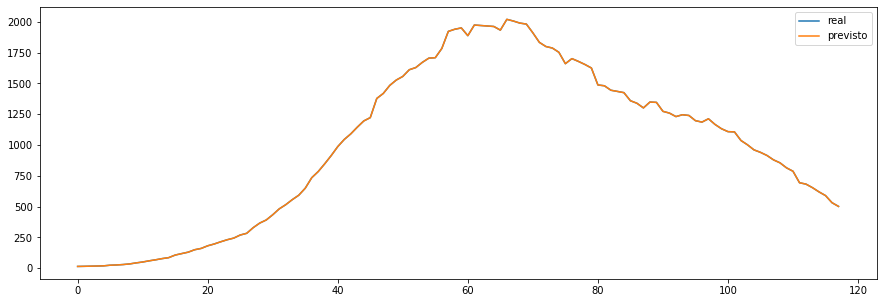

In [61]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(X, y)

plt.figure(figsize=(15, 5))
plt.plot(dados1.casos.values)
plt.plot(reg.predict(X))
plt.legend(['real', 'previsto']) 

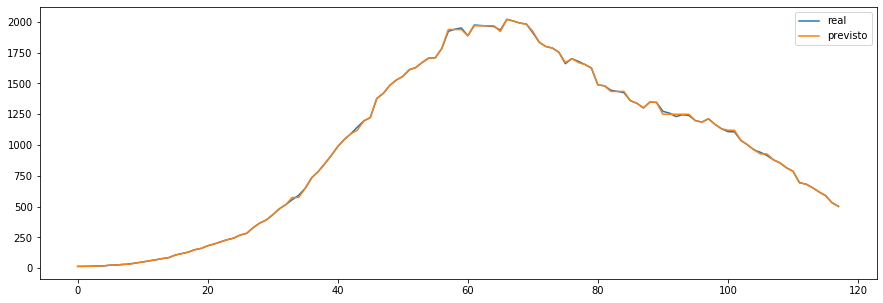

In [62]:
reg = DecisionTreeRegressor(max_depth=7) #Parmetro para profundidade da árvore
reg.fit(X, y)

plt.figure(figsize=(15, 5))
plt.plot(dados1.casos.values)
plt.plot(reg.predict(X))
plt.legend(['real', 'previsto']) 

In [63]:
dados1['month'] = dados1.index.month
dados1.head()

,casos,naive,x1,ar_1,x_1,x_2,x_3,x_4,x_5,month
data,,,,,,,,,,
2020-03-05,14.000000,12.142857,12.142857,24.268427,12.142857,11.928571,10.357143,9.142857,4.142857,3
2020-03-06,15.000000,14.000000,14.000000,26.109712,14.000000,12.142857,11.928571,10.357143,9.142857,3
2020-03-07,16.214286,15.000000,15.000000,27.101174,15.000000,14.000000,12.142857,11.928571,10.357143,3
2020-03-08,17.428571,16.214286,16.214286,28.305092,16.214286,15.000000,14.000000,12.142857,11.928571,3
2020-03-09,18.857143,17.428571,17.428571,29.509009,17.428571,16.214286,15.000000,14.000000,12.142857,3


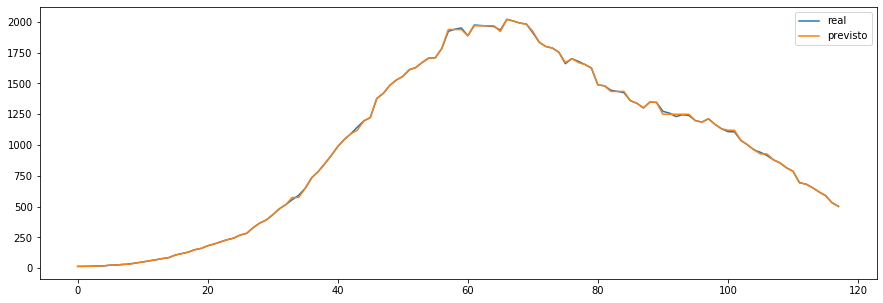

In [64]:
X = dados1.drop('casos', axis=1)
y = dados1.casos
reg = DecisionTreeRegressor(max_depth=7)
reg.fit(X, y)
plt.figure(figsize=(15, 5))
plt.plot(dados1.casos.values)
plt.plot(reg.predict(X))
plt.legend(['real', 'previsto'])

In [65]:
#Com validação
train_size = int(len(X) * 2/3)
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

reg = DecisionTreeRegressor(max_depth=7)
reg.fit(X_train, y_train)

((y_test - reg.predict(X_test)) ** 2).mean()

34421.53405612245

In [66]:
p = 3 #numero de lags a considerar
max_depth = 7

dados1 = dados[['casos']].copy()
for i in range(p):
    dados1[f'x_{i+1}'] = dados1.casos.shift(i + 1)
dados1.dropna(axis=0, inplace=True)
dados1['month'] = dados1.index.month

X = dados1.drop('casos', axis=1)
y = dados1.casos
train_size = int(len(X) * 2/3)
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

reg = DecisionTreeRegressor(max_depth=max_depth)
reg.fit(X_train, y_train)
((y_test - reg.predict(X_test)) ** 2).mean()

34531.522576530595

In [67]:
dados1.tail()

,casos,x_1,x_2,x_3,month
data,,,,,
2020-06-26,653.642857,682.642857,693.928571,787.214286,6
2020-06-27,619.571429,653.642857,682.642857,693.928571,6
2020-06-28,589.571429,619.571429,653.642857,682.642857,6
2020-06-29,531.642857,589.571429,619.571429,653.642857,6
2020-06-30,501.642857,531.642857,589.571429,619.571429,6


In [68]:
periodo_futuro = dados1.index[-1] + np.timedelta64(1, 'D')
X_new = [list(np.flip(dados1.casos.tail(p).values, axis=0)) + [periodo_futuro.month]]
X_new

[[501.64285714285717, 531.6428571428571, 589.5714285714286, 7]]

In [69]:
reg.predict(X_new)

array([556.28571429])

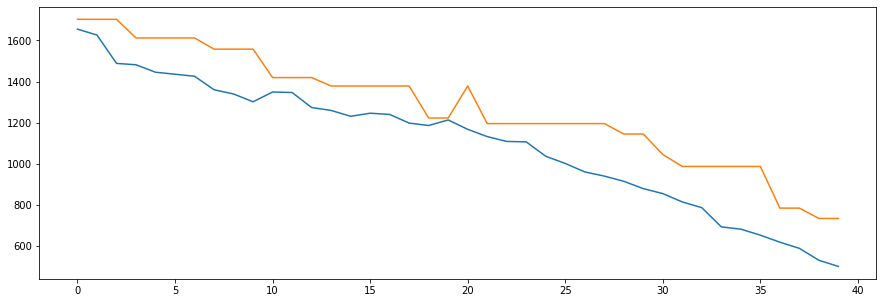

In [70]:
plt.figure(figsize=(15 ,5))
plt.plot(y_test.values)
plt.plot(reg.predict(X_test))